In [69]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline
import matplotlib.pyplot as plt

In [70]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])
test =  pd.read_csv('test.csv', parse_dates=['datetime'])

In [71]:
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

In [72]:
train['dayofweek'] = train['datetime'].dt.dayofweek
test['dayofweek'] = test['datetime'].dt.dayofweek

In [73]:
train['day'] = train['datetime'].dt.day
test['day'] = test['datetime'].dt.day

In [74]:
train['month'] = train['datetime'].dt.month
test['month'] = test['datetime'].dt.month

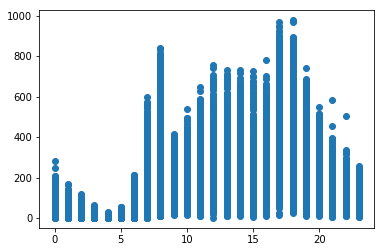

In [141]:
plt.scatter(train['hour'], train['count'])
plt.show()

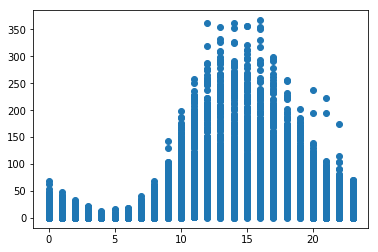

In [142]:
plt.scatter(train['hour'], train['casual'])
plt.show()

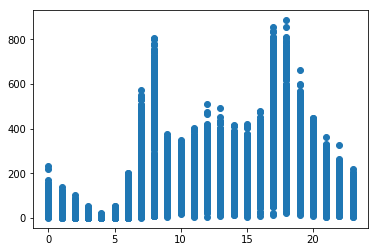

In [143]:
plt.scatter(train['hour'], train['registered'])
plt.show()

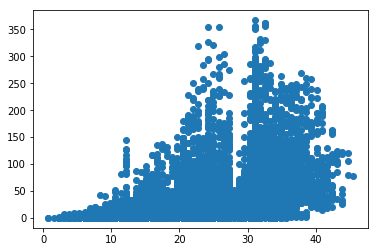

In [168]:
plt.scatter(train['atemp'], train['casual'])
plt.show()

In [75]:
train['weather'] = train['weather'] - 1

In [76]:
ohe_weather = preprocessing.OneHotEncoder(n_values=4, sparse = False)
weather_enc = pd.DataFrame(ohe_weather.fit_transform(train[['weather']]), columns=['weather_1', 'weather_2', 'weather_3', 'weather_4'])

In [77]:
train['month'] = train['month'] - 1

In [78]:
ohe_month = preprocessing.OneHotEncoder(n_values=12, sparse = False)
month_enc = pd.DataFrame(ohe_month.fit_transform(train[['month']]), columns=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

In [79]:
train['day'] = train['day'] - 1

In [80]:
ohe_day = preprocessing.OneHotEncoder(n_values=31, sparse = False)
day_enc = pd.DataFrame(ohe_day.fit_transform(train[['day']]), columns=['day_1', 'day_2', 'day_3','day_4','day_5','day_6','day_7','day_8','day_9','day_10','day_11','day_12','day_13','day_14','day_15','day_16','day_17','day_18','day_19','day_20','day_21','day_22','day_23','day_24','day_25','day_26','day_27','day_28','day_29','day_30', 'day_31'])

In [81]:
ohe_dayofweek = preprocessing.OneHotEncoder(n_values=7, sparse = False)
dayofweek_enc = pd.DataFrame(ohe_dayofweek.fit_transform(train[['dayofweek']]), columns=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])

In [82]:
ohe_hour = preprocessing.OneHotEncoder(n_values=24, sparse = False)
hour_enc = pd.DataFrame(ohe_hour.fit_transform(train[['hour']]), columns=['hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'])

In [83]:
train['season'] = train['season'] -1

In [84]:
ohe_season = preprocessing.OneHotEncoder(n_values=4, sparse = False)
season_enc = pd.DataFrame(ohe_season.fit_transform(train[['season']]), columns=['spring', 'summer', 'fall', 'winter'])

In [85]:
train['holiday'] = train['holiday'].astype(float)
train['workingday'] = train['workingday'].astype(float)

In [89]:
df = pd.concat([train, weather_enc, month_enc, day_enc, dayofweek_enc, hour_enc], axis=1)

In [91]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'dayofweek', 'day', 'month', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'jan', 'feb', 'mar', 'apr', 'may', 'jun',
       'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'day_1', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'ho

In [94]:
df = df.drop(['datetime', 'season','weather','casual', 'registered','casual', 'registered'], axis=1)

In [124]:
regr_1 = DecisionTreeRegressor(max_depth=4)

In [125]:
X = df.drop(['count'], axis=1)
y = df['count']

In [126]:
regr_1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [127]:
regr_1.feature_importances_

array([ 0.        ,  0.01507968,  0.15872169,  0.        ,  0.        ,
        0.        ,  0.60216365,  0.00354644,  0.        ,  0.04454977,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [99]:
X.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'hour', 'dayofweek', 'day', 'month', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'jan', 'feb', 'mar', 'apr', 'may', 'jun',
       'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'day_1', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [70]:
test_enc.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'season_1', 'season_2', 'season_3',
       'season_4', 'holiday_0', 'holiday_1', 'workingday_0', 'workingday_1',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_30', 'day_31', 'dayofweek_0',
       'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4',
       'dayofweek_5', 'dayofweek_6', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23'],
      dtype='object')